# BostonHousing: EDA

## Import modules, mounting Google Drive, reading data

In [ ]:
# import modules
import pandas as pd # for data analysis
import numpy as np # for numeric functions
import matplotlib.pyplot as plt # for plotting

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# read data
# on the lefthand side, navigate to your data and copy the path
df = pd.read_csv('/content/drive/My Drive/OPIM 5509/Module 1: Python Bootcamp/Data/BostonHousing.csv')

## Head, shape, column names, data types, missing values
Checking for any missing values? Wrong data types? Strange values?


In [ ]:
# head
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# shape
df.shape

(506, 14)

In [ ]:
# column names
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
# data types
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [ ]:
# try .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [ ]:
# missing values in entire dataframe
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum().sum()

0

In [ ]:
# missing values by column
# link: https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

## Statistics, percentiles


In [ ]:
# describe() gives summary statistics
df.describe()

# it looks like 'chas' is hiding as a float, we will ignore that for now (min=0, max=1)
# 'chas' is a logical/indicator/binary/flag/dummy variable for "Near Charles River"

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# calculate more detailed percentiles or stats on your own
# let's focus on the target variable 'medv'

# mean
print("This is the mean: ")
df['medv'].mean() # in this case we are using the mean() function from pandas, but we don't need to say pd.df['medv'].mean(),
                  # since it is already a dataframe, you can use ALL the pandas functionality

This is the mean: 


22.532806324110698

In [ ]:
# mean rounded to two decimal points
print("This is the mean rounded to two decimal points: ")
np.round(df['medv'].mean(),2) # we can use a round() function, just like in Excel

This is the mean rounded to two decimal points: 


22.53

In [ ]:
# median
print("This is the median: ") # print statements don't matter, but they make the output look nice
df['medv'].median() # this is the median function from pandas, but we don't say pd.df['medv'].median(),
                    # because it is already a dataframe, so you can use ALL of the pandas functionality

This is the median: 


21.2

In [ ]:
# mode
# sometimes in a numeric column, there might not be an interesting mode
print("This is the mode:")
df['medv'].mode() # 50 is the mode! Interesting... will be interesting to visualize what this distribution looks like

This is the mode:


0    50.0
dtype: float64

In [ ]:
# percentiles
# link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html
print("Here is the 10th percentile, which means 10% of the data lies below this value:")
df['medv'].quantile(0.1)

Here is the 10th percentile, which means 10% of the data lies below this value:


12.75

In [ ]:
# let's look at the 10, 25, 50, 75, 90 percentiles
print("Here is the 10th percentile, which means 10% of the data lies below this value:")
df['medv'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])

# notice how we entered the values as a list inside the function (square brackets [])
# check your work! scroll back up to describe and look at if the values line up (like 25, 50 and 75)

Here is the 10th percentile, which means 10% of the data lies below this value:


0.10    12.750
0.25    17.025
0.50    21.200
0.75    25.000
0.90    34.800
Name: medv, dtype: float64

## Flag variables
Convert some variables to 0 or 1 to help subset, explore trends

In [ ]:
# make a new column to recode the target variable 'medv' to a 0 or 1
# 0 if less than or equal to the mean
# 1 if greater than the mean

# one line of code! we made a new column and populated it
df['FLAG_medv'] = np.where(df['medv'] <= np.mean(df['medv']), 0, 1)

# check your work!
print('The mean of medv is:', df['medv'].mean())
df.head()

The mean of medv is: 22.532806324110698


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


## Subsetting rows and columns
Sometimes data has extra columns you're not interested in... drop them! Other times you may want to focus on just a subset of data.

In [ ]:
# subset all rows where FLAG_medv = 0, we'll call this 'lowData'
lowData = df[df['FLAG_medv'] == 0]
print(lowData.shape) # make sure you got something... at least some rows... not empty...
                      # if you want to print two things in one cell, the first needs a print statement

lowData.head() # check your work

(297, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,0
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0,0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9,0


In [ ]:
# subset all rows where FLAG_medv = 0, we'll call this 'lowData'
# copy and paste the text above and reuse
highData = df[df['FLAG_medv'] == 1]
print(highData.shape) # make sure you got something... at least some rows... not empty...
                      # if you want to print two things in one cell, the first needs a print statement

highData.head() # check your work

(209, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,FLAG_medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [ ]:
# do the number of rows in lowData and highData equal the original rows?
tmpRows = lowData.shape[0] + highData.shape[0]

In [ ]:
# a logical statement
tmpRows == df.shape[0] # TRUE! it worked

True

## Group By (pivot tables)
Count, min, max, mean, standard deviation

In [ ]:
# link: https://stackoverflow.com/questions/33575587/pandas-dataframe-how-to-apply-describe-to-each-group-and-add-to-new-columns
df.groupby('FLAG_medv').describe() #ONE LINE OF CODE! Too easy.

# now we can compare the attributes of all the numeric variables
# recall that describe() is only useful for numeric variables

age                              ...     zn                  
           count       mean        std   min  ...    25%  50%   75%    max
FLAG_medv                                     ...                         
0          297.0  79.009764  22.561782  17.5  ...    0.0  0.0   0.0   80.0
1          209.0  53.746411  28.686963   2.9  ...    0.0  0.0  33.0  100.0

[2 rows x 112 columns]

## Correlation Matrix
Explore the relationship between numeric variables

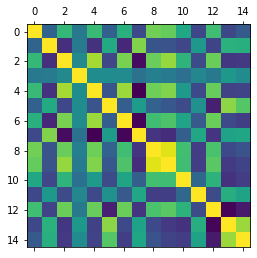

In [ ]:
# link: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
plt.matshow(df.corr())
plt.show()

# this is OK... but there's no legend and no interesting labels...
# keep scrolling the article and you will find the sns plot (seaborn)

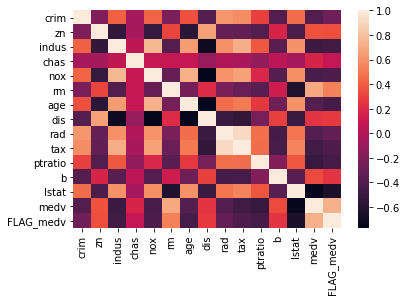

In [ ]:
# pretty! we haven't used seaborn yet, but it is certainly a nice library
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# notice perfect correlation along the diagonal (as expected)
# it's most interesting to look at correlation among predictors, and with the target

## Univariate Plots
Boxplots, kernel density plots, histograms

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

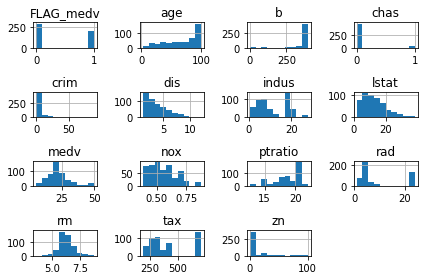

In [ ]:
# show histograms of ALL variables
# histograms allow you to see the shape of the distribution... binned data...
df.hist() # this makes the histogram plot
plt.tight_layout() # space stuff out nicely (what happens without this?)
plt.show()

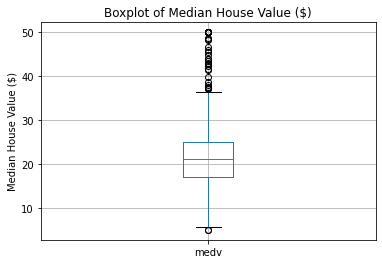

In [ ]:
# boxplots
df.boxplot('medv') # grab the dataframe then select the 'medv' column
plt.ylabel('Median House Value ($)')
plt.title("Boxplot of Median House Value ($)")
plt.show()

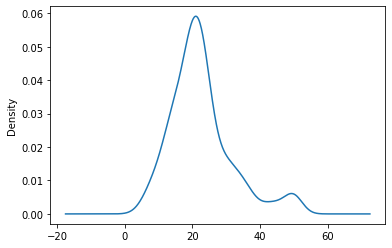

In [ ]:
df['medv'].plot.density() # notice the difference in syntax! where does medv go?
plt.show()                # grab the column of interest then make a plot

## Bivariate Plots
Scatterplots

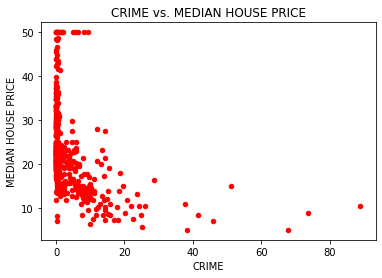

In [ ]:
# here's an easy plot of x = crim and y = medv
df.plot.scatter(x='crim', y='medv', color='red') # notice you just need the names of the columns
plt.xlabel("CRIME")
plt.ylabel("MEDIAN HOUSE PRICE")
plt.title("CRIME vs. MEDIAN HOUSE PRICE")
plt.show()

# every plot you make should have sensible labels and titles! NO EXCUSE!

# you can get fancy and add a smoother...
# link: https://stackoverflow.com/questions/23784399/how-to-visualize-a-nonlinear-relationship-in-a-scatter-plot

In [ ]:
# advanced - make two scatterplots side by side, these are known as subplots
# link: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

## Pandas profiler
(Optional). Use this for a quick, automated check of the data... coding your own is best, but this is good for a quick check if you're tight for time.

In [ ]:
# link: https://stackoverflow.com/questions/53085501/how-to-upgrade-pandas-on-google-colab
# you may need to update pandas
!pip install pandas==0.23.4 # restart your runtime

In [ ]:
# link: https://towardsdatascience.com/exploratory-data-analysis-with-pandas-profiling-de3aae2ddff3
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof # show the report

Number of variables,15
Number of observations,506
Total Missing (%),0.0%
Total size in memory,59.4 KiB
Average record size in memory,120.2 B
Numeric,12
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,1
